<a href="https://colab.research.google.com/github/jbmarti8/jbmarti8.github.io/blob/main/Home_Prices_Business_Case_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Home Price Prediction

This code goes through the steps of the predictive modeling process: data ingestion, cleaning, feature engineering, model building, and model selection. The ultimate output will be a regression that predicts home price based on a number of home-specific characteristics.

In [ ]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, GammaRegressor, Lasso
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, r2_score

###Step 1 - Import Data

Read the data in from csv files saved on Google Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Import the train data
train = pd.read_csv('/content/drive/MyDrive/UW GENBUS 886 - Predictive Modeling/Week 8/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Import the test data
test = pd.read_csv('/content/drive/MyDrive/UW GENBUS 886 - Predictive Modeling/Week 8/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
# Create a col train_test to differentiate these two tables when we combine for cleaning
train['train_test'] = 'train'
test['train_test'] = 'test'

###Step 2 - Scope and Clean Data



In [ ]:
# Check dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are certain variables that are coded as numeric but we really want to treat them as categorical, so convert those to string now

In [ ]:
# Convert MSSubClass to an object
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

train['MoSold'] = train['MoSold'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [ ]:
# Check Summary stats for numeric vars
train.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


####Handle Outlier Values
For numerical vars, cap outlier values at the 95th percentile value.

In [ ]:
# Create list of numerical cols
numeric_cols = train.select_dtypes(include=['number']).columns.tolist()

# Drop ID and SalePrice
numeric_cols.remove('Id')
numeric_cols.remove('SalePrice')

In [ ]:
# Define functions to calculate thresholds, replace outliers, and verify the replacements worked

# Set thresholds
def thresholds(df, col, q1=0.05, q3=0.95):
    quartile1 = df[col].quantile(q1)
    quartile3 = df[col].quantile(q3)

    interquantile_range = quartile3 - quartile1

    ub = quartile3 + 1.5 * interquantile_range
    lb = quartile1 - 1.5 * interquantile_range

    return lb, ub

# Replace outlier values
def replace(df, var):
    lb, ub = thresholds(df, var)
    df.loc[(df[var] < lb), var] = lb
    df.loc[(df[var] > ub), var] = ub

# Assign outlier to value in data
def check_outlier(df, col):
    low_limit, up_limit = thresholds(df, col)
    if df[(df[col] > up_limit) | (df[col] < low_limit)].shape[0] > 0:
        return True
    else:
        return False

In [ ]:
# Override outlier values with the upper bound quartile value
for var in numeric_cols:
  replace(train, var)

<ipython-input-11-301882ad1a61>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-17822.474999999995' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[var] < lb), var] = lb
<ipython-input-11-301882ad1a61>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1779.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[var] < lb), var] = lb
<ipython-input-11-301882ad1a61>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1864.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[var] < lb), var] = lb
<ipython-input-11-301882ad1a61>:18: FutureWarning: Setting an item of incompatible dtype is deprecated

In [ ]:
for var in numeric_cols:
  print(var,": ",check_outlier(train, var))

LotFrontage :  False
LotArea :  False
OverallQual :  False
OverallCond :  False
YearBuilt :  False
YearRemodAdd :  False
MasVnrArea :  False
BsmtFinSF1 :  False
BsmtFinSF2 :  False
BsmtUnfSF :  False
TotalBsmtSF :  False
1stFlrSF :  False
2ndFlrSF :  False
LowQualFinSF :  False
GrLivArea :  False
BsmtFullBath :  False
BsmtHalfBath :  False
FullBath :  False
HalfBath :  False
BedroomAbvGr :  False
KitchenAbvGr :  False
TotRmsAbvGrd :  False
Fireplaces :  False
GarageYrBlt :  False
GarageCars :  False
GarageArea :  False
WoodDeckSF :  False
OpenPorchSF :  False
EnclosedPorch :  False
3SsnPorch :  False
ScreenPorch :  False
PoolArea :  False
MiscVal :  False
YrSold :  False


Now that outlier values in the train data have been handled, combine the train and test datasets for the rest of the data cleaning steps

In [ ]:
# Combine the train and test data, reset the index
comb = pd.concat([train, test], axis=0).reset_index(drop=True)
comb.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003.0,2003.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0,1710.0,1.0,0.0,2.0,1.0,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.0,61.0,0.0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976.0,1976.0,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0,1262.0,0.0,1.0,2.0,0.0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298.0,0.0,0.0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001.0,2002.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0,1786.0,1.0,0.0,2.0,1.0,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.0,42.0,0.0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915.0,1970.0,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0,1717.0,1.0,0.0,1.0,0.0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.0,35.0,272.0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000.0,2000.0,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0,2198.0,1.0,0.0,2.0,1.0,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192.0,84.0,0.0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


###Handle Null Values

In [ ]:
# Check for null values by var
for col in comb.columns:
  if comb[col].isnull().sum() > 0:
    print(col,": ", comb[col].isnull().sum(), train[col].dtype)

MSZoning :  4 object
LotFrontage :  486 float64
Alley :  2721 object
Utilities :  2 object
Exterior1st :  1 object
Exterior2nd :  1 object
MasVnrType :  1766 object
MasVnrArea :  23 float64
BsmtQual :  81 object
BsmtCond :  82 object
BsmtExposure :  82 object
BsmtFinType1 :  79 object
BsmtFinSF1 :  1 int64
BsmtFinType2 :  80 object
BsmtFinSF2 :  1 float64
BsmtUnfSF :  1 int64
TotalBsmtSF :  1 float64
Electrical :  1 object
BsmtFullBath :  2 float64
BsmtHalfBath :  2 float64
KitchenQual :  1 object
Functional :  2 object
FireplaceQu :  1420 object
GarageType :  157 object
GarageYrBlt :  159 float64
GarageFinish :  159 object
GarageCars :  1 float64
GarageArea :  1 float64
GarageQual :  159 object
GarageCond :  159 object
PoolQC :  2909 object
Fence :  2348 object
MiscFeature :  2814 object
SaleType :  1 object
SalePrice :  1459 int64


In [ ]:
# Right off the bat, drop cols with a majority null values
comb = comb.drop(['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'], axis = 1)

In [ ]:
# Print distinct values in each of these variables
for col in comb.columns:
  if comb[col].isnull().sum() > 0:
    if comb[col].dtype == 'object':
      print(col,": ", comb[col].unique())

MSZoning :  ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Utilities :  ['AllPub' 'NoSeWa' nan]
Exterior1st :  ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' nan]
Exterior2nd :  ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock' nan]
BsmtQual :  ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond :  ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure :  ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 :  ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 :  ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical :  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
KitchenQual :  ['Gd' 'TA' 'Ex' 'Fa' nan]
Functional :  ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' nan]
GarageType :  ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish :  ['RFn' 'Unf' 'Fin' nan]
GarageQual :  ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCo

In [ ]:
# Take value counts by columns
for col in comb.columns:
  if comb[col].isnull().sum() > 0:
    if comb[col].dtype == 'object':
      print(comb[col].value_counts())

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64
Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64
Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64
Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64
BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
BsmtFi

In [ ]:
# Replace Na's in the categorical variables where the NA is due to the home simply not having that feature
comb['BsmtQual'] = comb['BsmtQual'].fillna('No')
comb['BsmtCond'] = comb['BsmtCond'].fillna('No')
comb['BsmtExposure'] = comb['BsmtExposure'].fillna('No')
comb['BsmtFinType1'] = comb['BsmtFinType1'].fillna('No')
comb['BsmtFinType2'] = comb['BsmtFinType2'].fillna('No')
comb['Electrical'] = comb['Electrical'].fillna('No')
comb['GarageType'] = comb['GarageType'].fillna('No')
comb['GarageFinish'] = comb['GarageFinish'].fillna('No')
comb['GarageQual'] = comb['GarageQual'].fillna('No')
comb['GarageCond'] = comb['GarageCond'].fillna('No')

# Replace remainging categorical nulls with the mode value
comb['MSZoning'] = comb['MSZoning'].fillna('RL')
comb['Utilities'] = comb['Utilities'].fillna('AllPub')
comb['Exterior1st'] = comb['Exterior1st'].fillna('VinylSd')
comb['Exterior2nd'] = comb['Exterior2nd'].fillna('VinylSd')
comb['KitchenQual'] = comb['KitchenQual'].fillna('TA')
comb['Functional'] = comb['Functional'].fillna('Typ')
comb['SaleType'] = comb['SaleType'].fillna('WD')

In [ ]:
# Fill NA values for numeric cols
comb['LotFrontage'] = comb['LotFrontage'].fillna(0)
comb['MasVnrArea'] = comb['MasVnrArea'].fillna(0)
comb['BsmtFinSF1'] = comb['BsmtFinSF1'].fillna(0)
comb['BsmtFinSF2'] = comb['BsmtFinSF2'].fillna(0)
comb['BsmtUnfSF'] = comb['BsmtUnfSF'].fillna(0)
comb['TotalBsmtSF'] = comb['TotalBsmtSF'].fillna(0)
comb['BsmtFullBath'] = comb['BsmtFullBath'].fillna(0)
comb['BsmtHalfBath'] = comb['BsmtHalfBath'].fillna(0)
comb['GarageYrBlt'] = comb['GarageYrBlt'].fillna(comb['YearBuilt'])
comb['GarageCars'] = comb['GarageCars'].fillna(0)
comb['GarageArea'] = comb['GarageArea'].fillna(0)

In [ ]:
# Check for null values by var
for col in comb.columns:
  if comb[col].isnull().sum() > 0:
    print(col,": ", comb[col].isnull().sum(), train[col].dtype)

SalePrice :  1459 int64


###Step 3 - Prepare Data for Analysis

Now that we have cleaned the data, need to perform some further checks to ensure the data is ready for analysis. These steps include:

- Looking at distributions
- Checking for correlations
- Feature engineering
- Create Dummy Variables
- Scaling
- Splitting Data into Training and Testing Sets

####First, check the distribution of the log of sales price

Text(0, 0.5, 'Frequency')

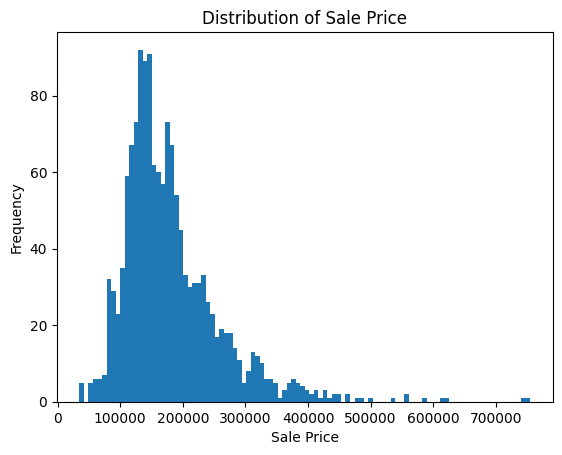

In [ ]:
# Plot histogram of SalePrice
plt.hist(comb['SalePrice'], bins = 100)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

The distribution looks to have a heavy right-tail skew, so transform the SalePrice to be a log, this will help "normalize" the distribution a bit better.

Text(0, 0.5, 'Frequency')

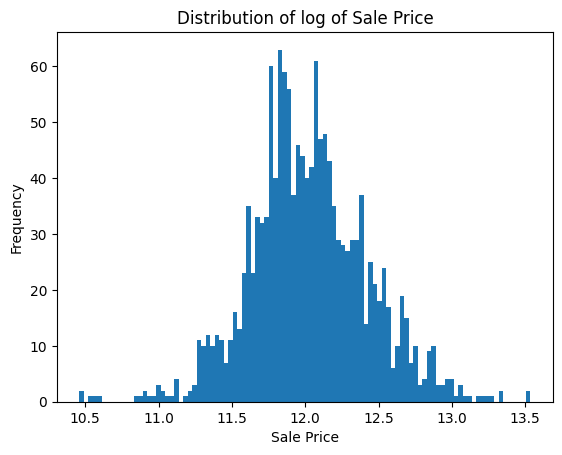

In [ ]:
# Do same plot but for log
plt.hist(np.log1p(comb['SalePrice']), bins = 100)
plt.title('Distribution of log of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

####Check numeric explanatory variables for correlation

In [ ]:
# Isolate numeric vars
numeric_vars = comb.select_dtypes(include=('number'))

In [ ]:
numeric_vars = numeric_vars.drop(['Id','SalePrice'], axis = 1)

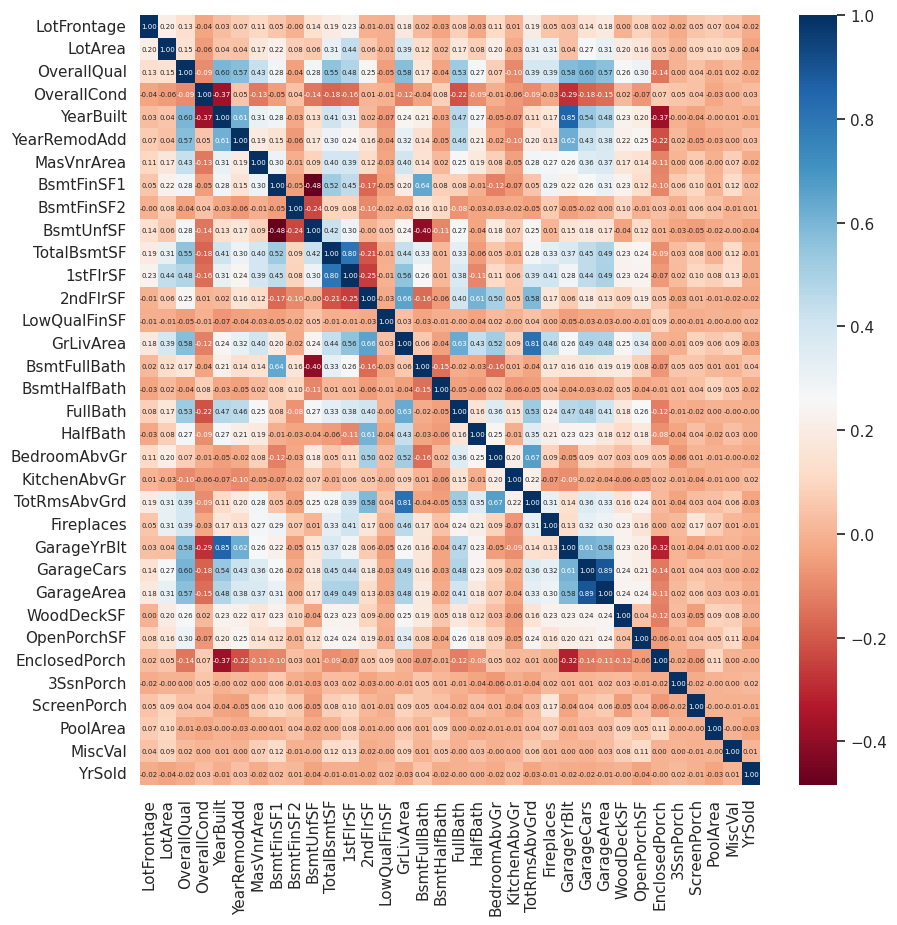

In [ ]:
# Create correlation table
corr = numeric_vars.corr()

sns.set_theme(rc={"figure.figsize":(10,10)})
sns.heatmap(corr, annot = True, fmt=".2f",cmap="RdBu",annot_kws={"size":5})
plt.show()

Based on the correlations between the numerical vars, drop a few variables that are highly correlated with another.
- Drop GarageCars, highly correlated with GarageArea
- Drop GarageYrBlt, highly correlated with YearBuilt
- Drop GrLivArea, highly correlated with TotRmsAbvGrd

In [ ]:
# Drop highly correlated cols
comb = comb.drop(['GarageCars','GarageYrBlt','GrLivArea'], axis = 1)

###Plot SalePrice against each numerical var
- Check to see if there any any non-linear relationships that could be feature engineered

In [ ]:
# Plot each numerical var against SalePrice
def plot_var_price(df, t_var):
  numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
  numeric_cols.remove(t_var)

  for col in numeric_cols:
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=df[col], y=df[t_var])
    plt.title(f'{col} vs {t_var}')
    plt.xlabel(col)
    plt.ylabel(t_var)
    plt.show()

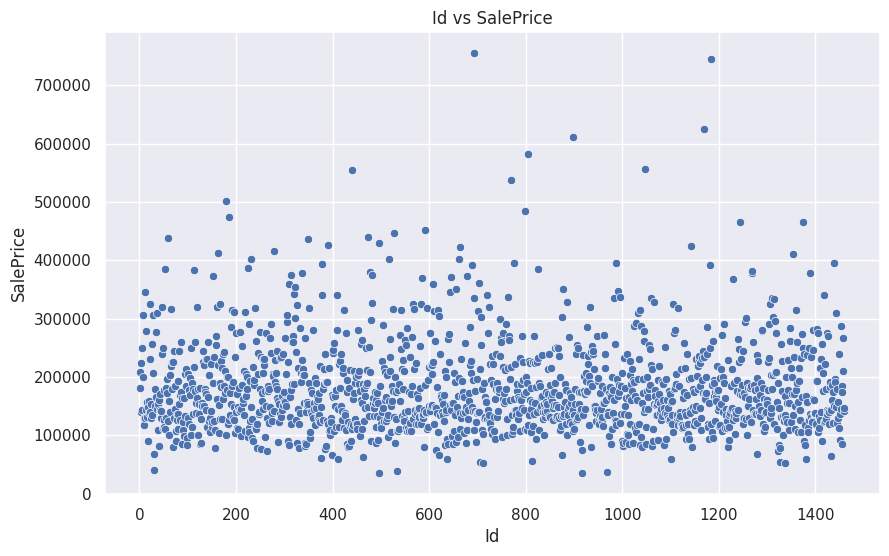

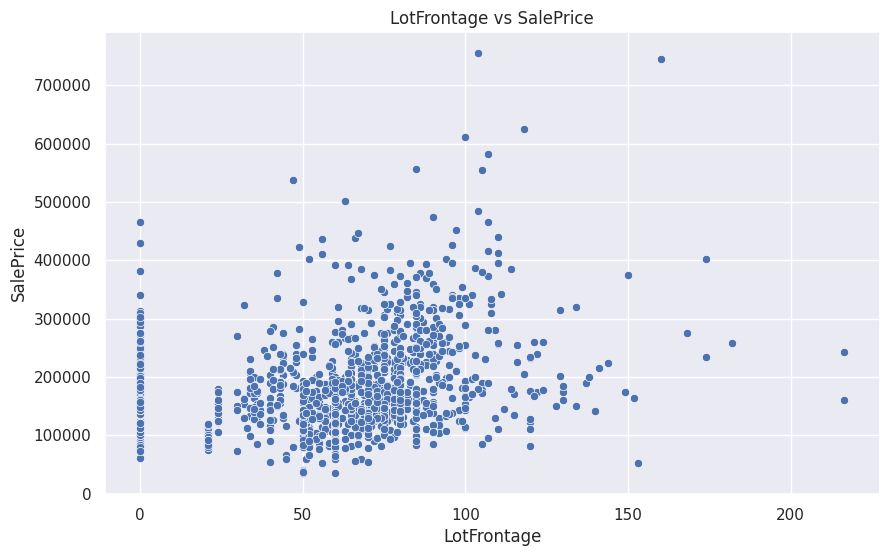

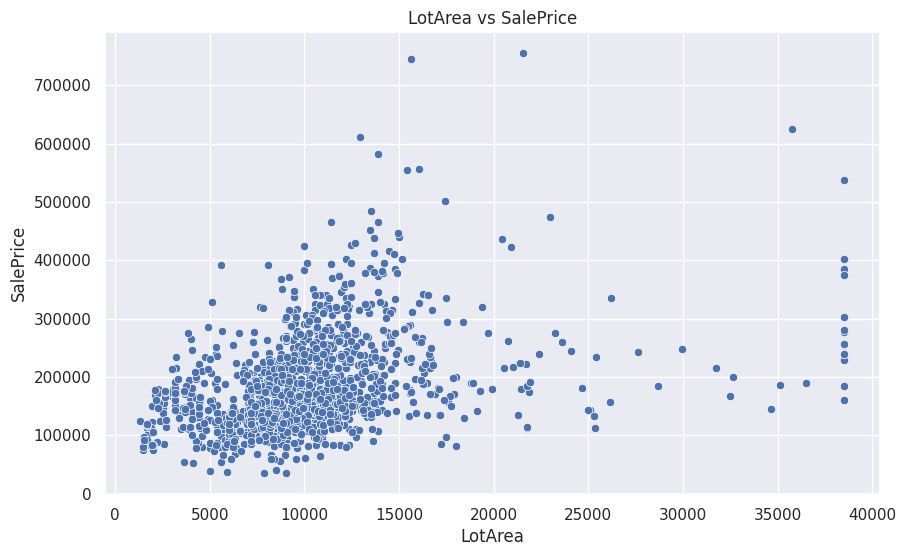

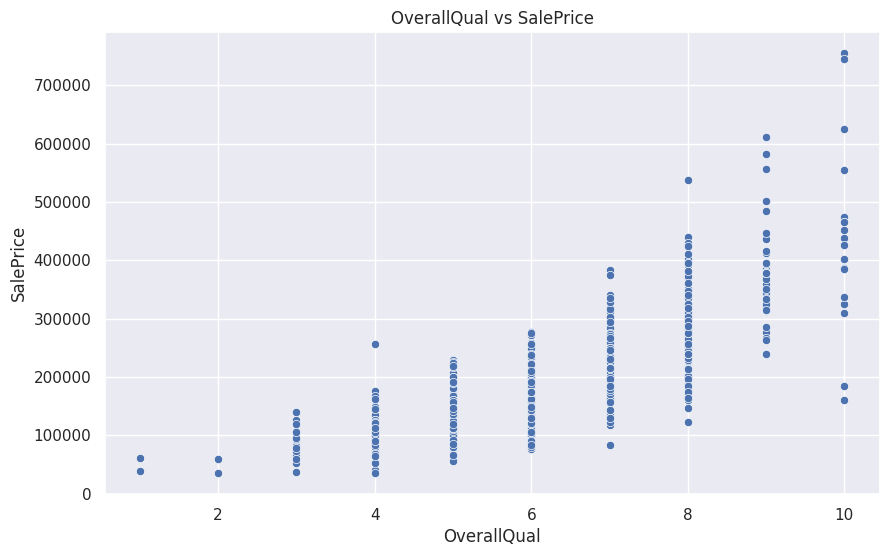

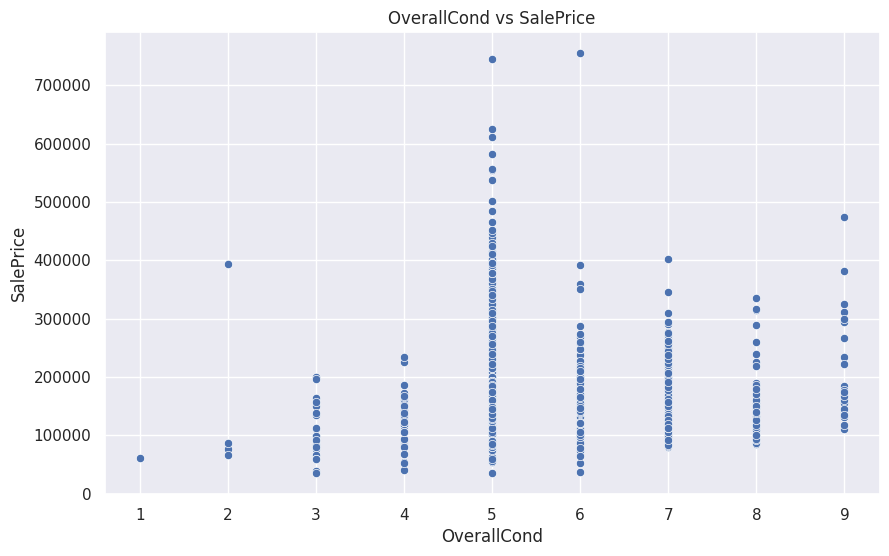

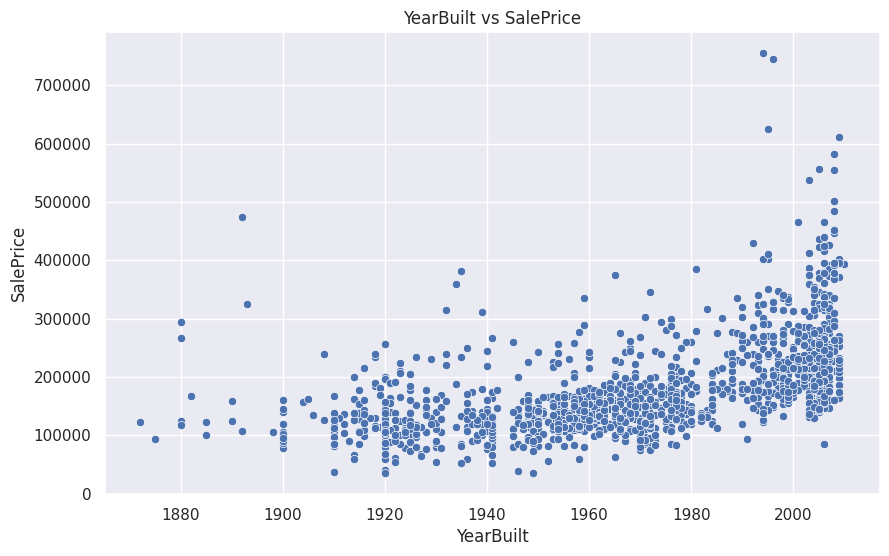

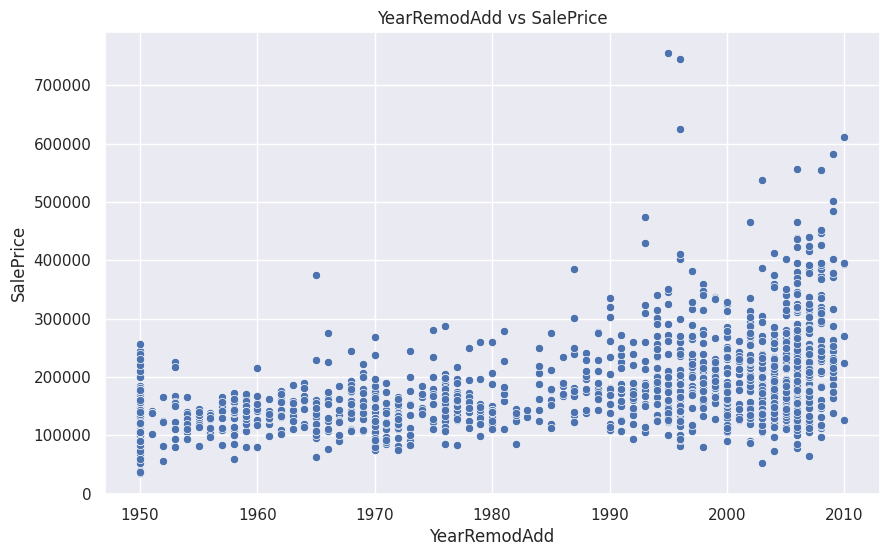

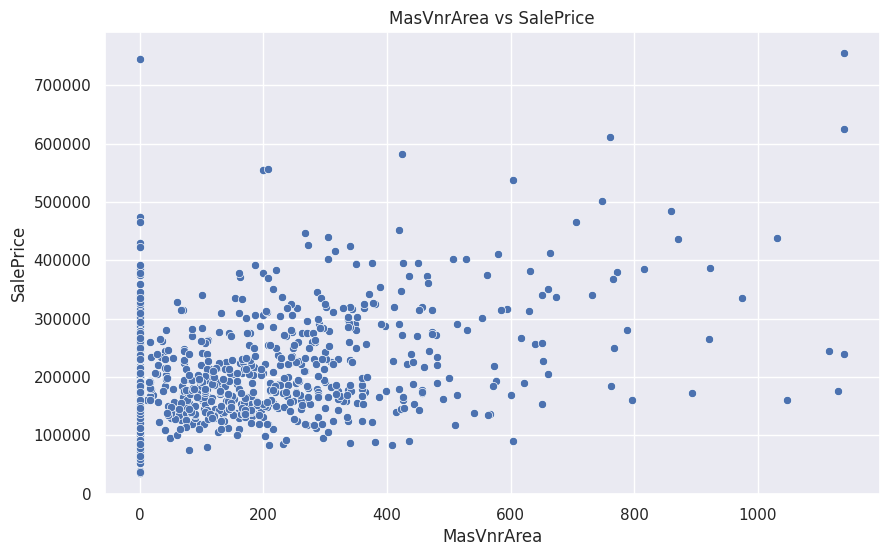

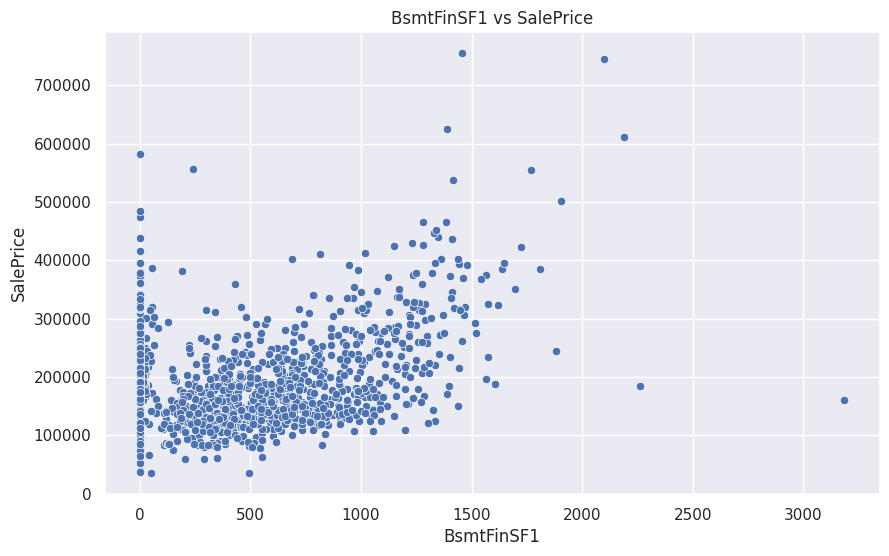

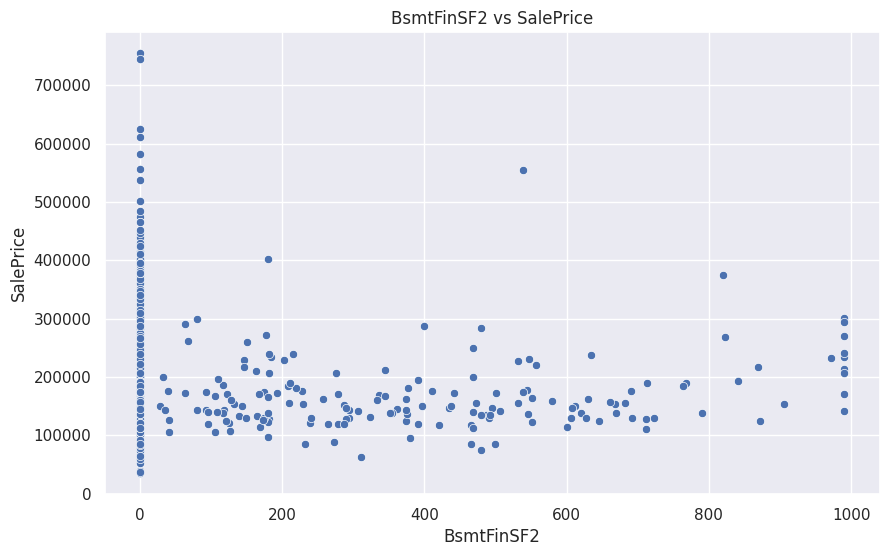

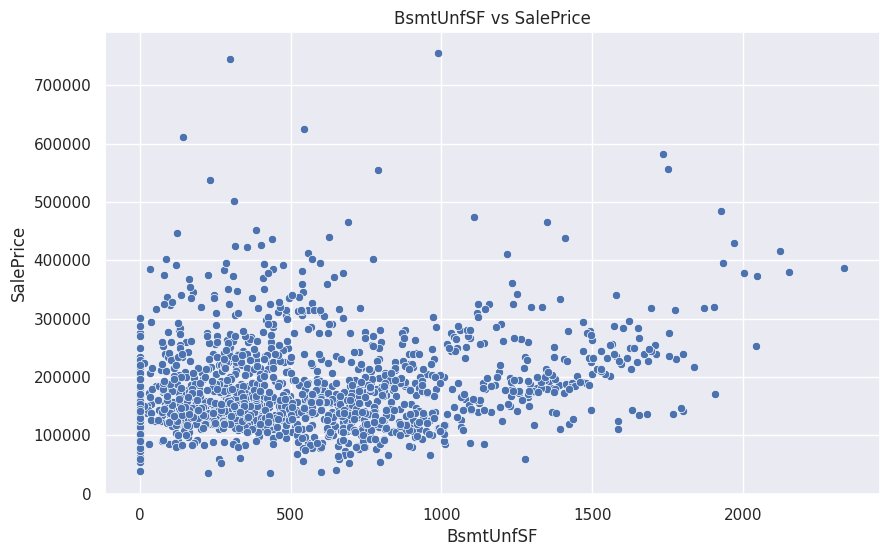

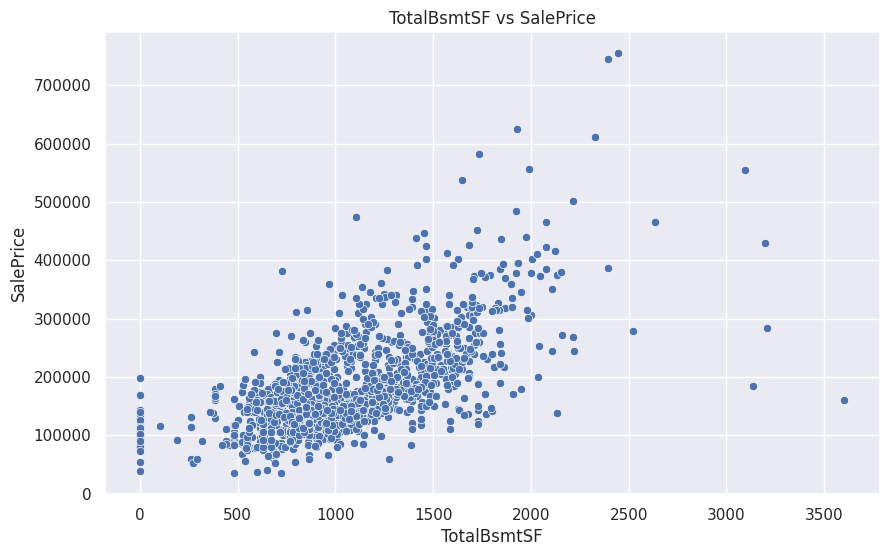

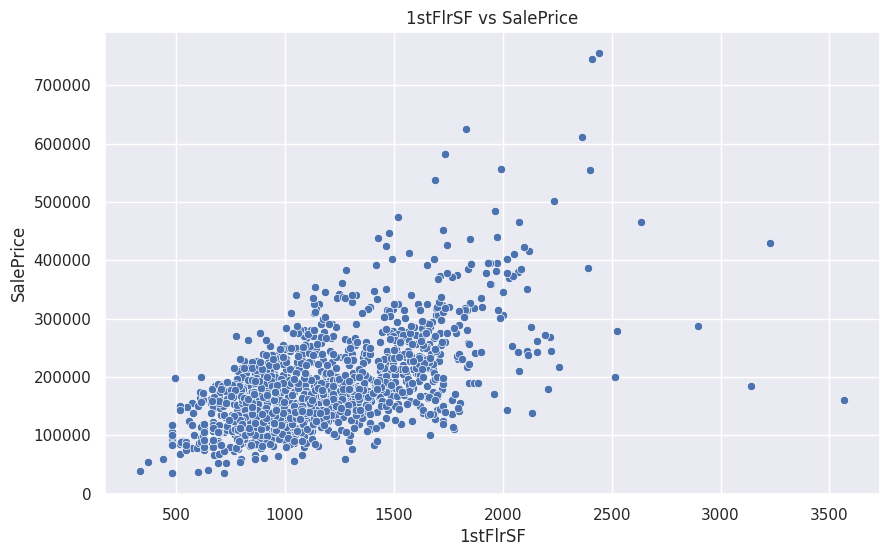

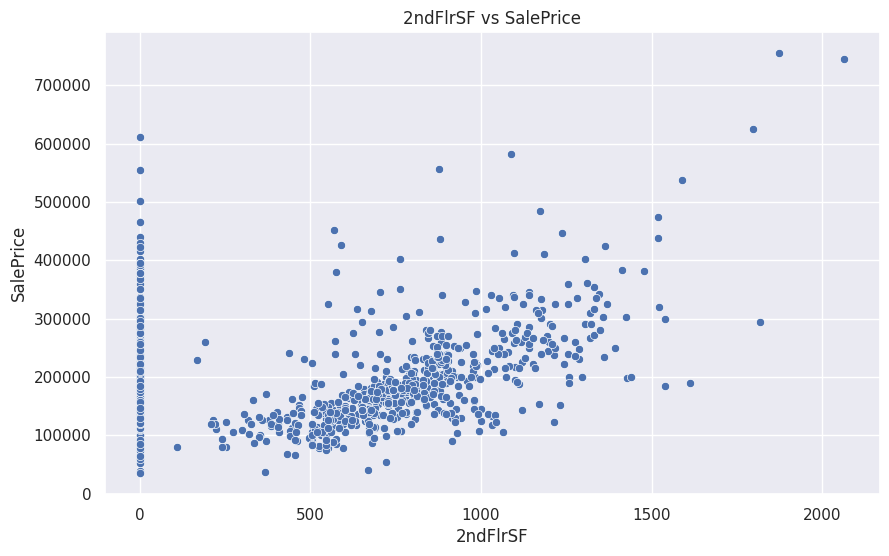

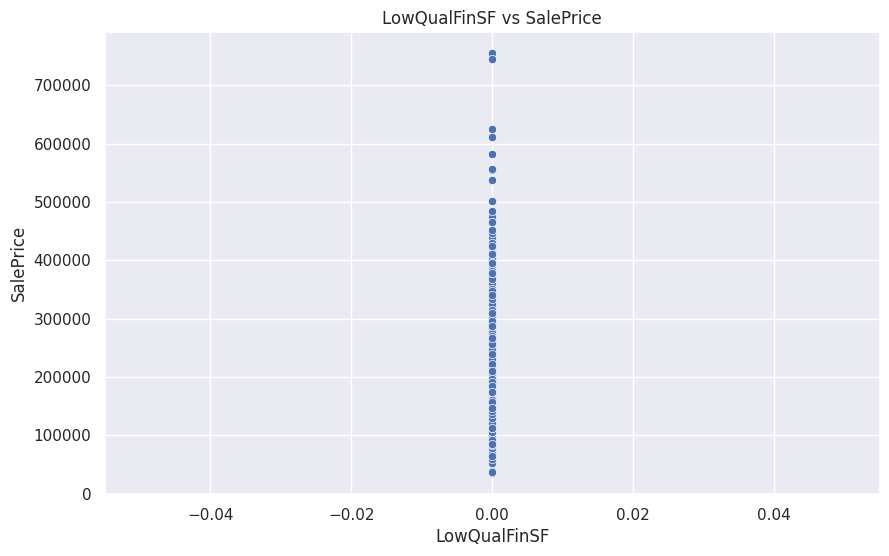

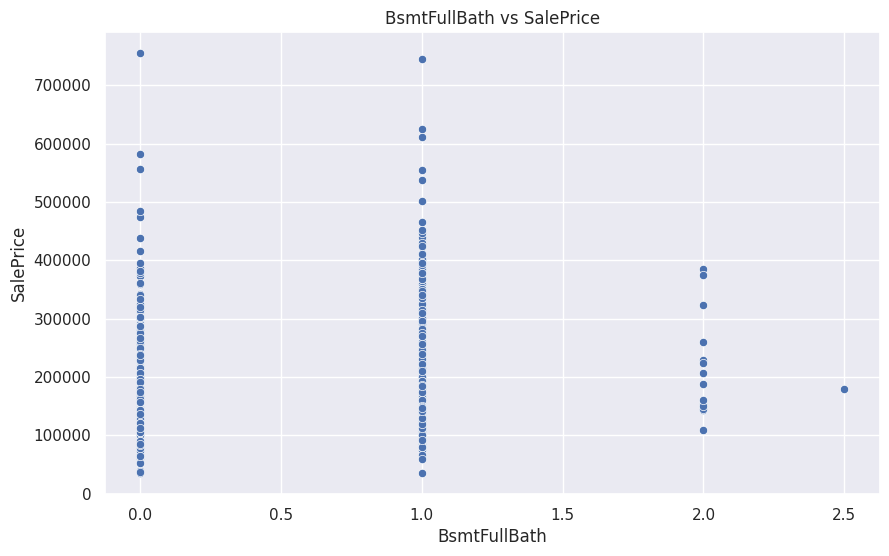

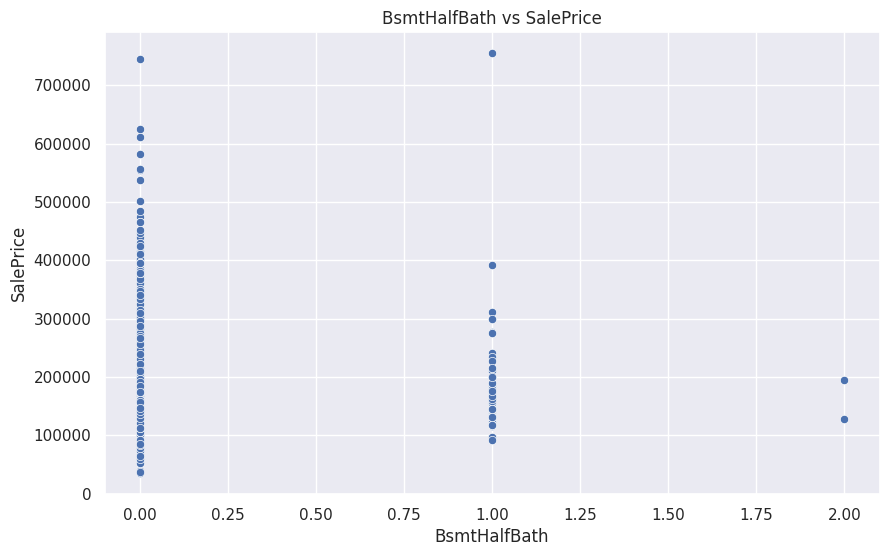

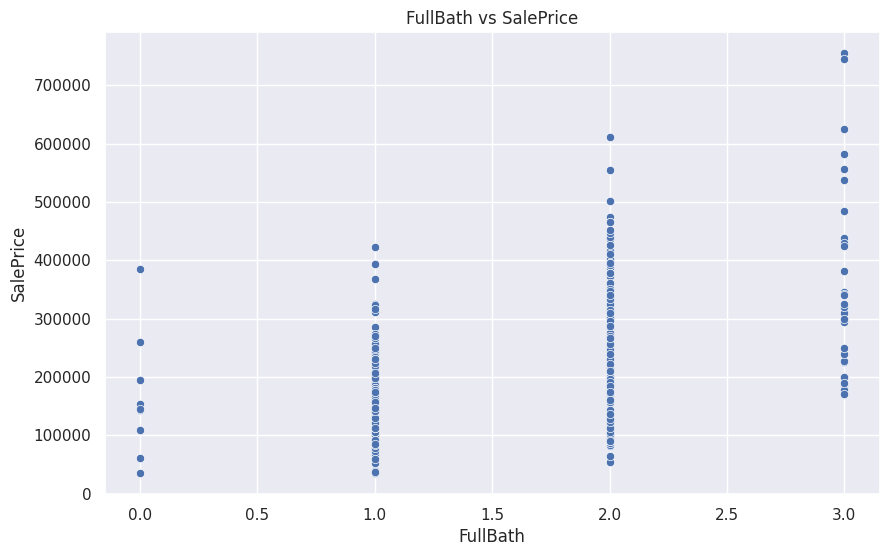

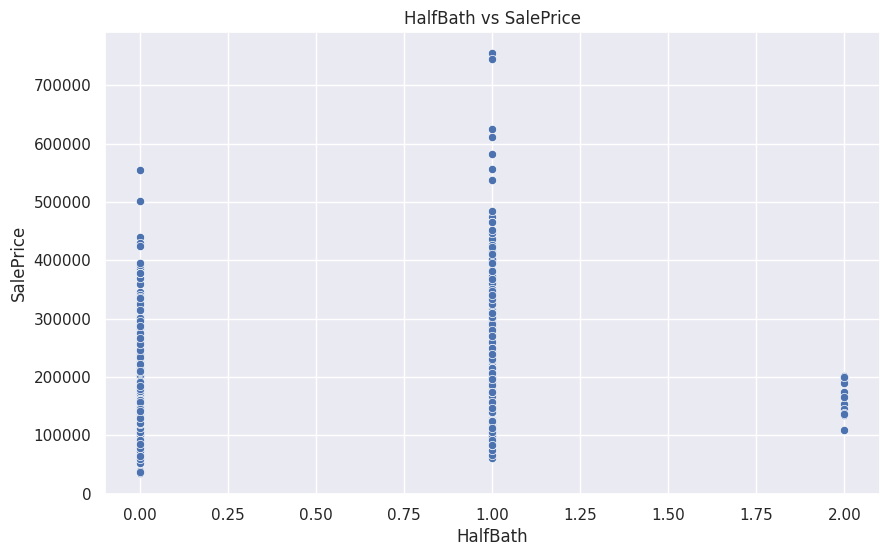

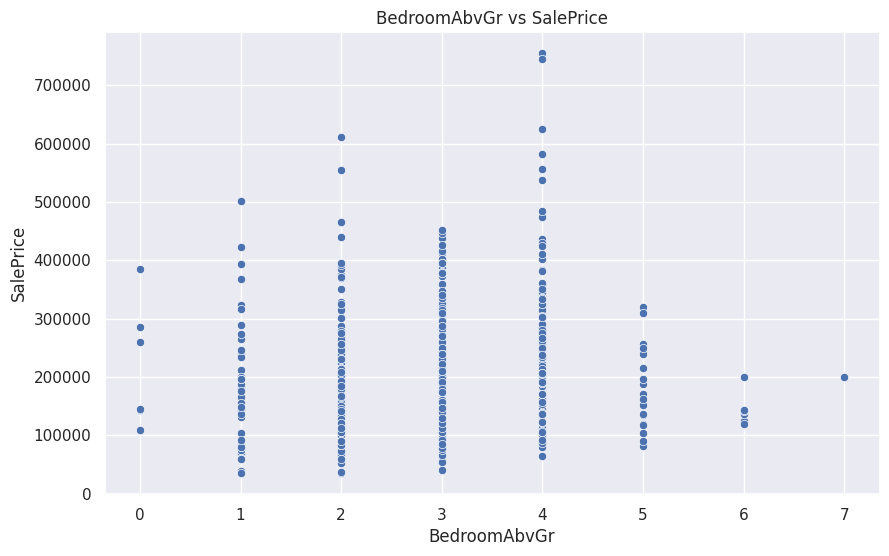

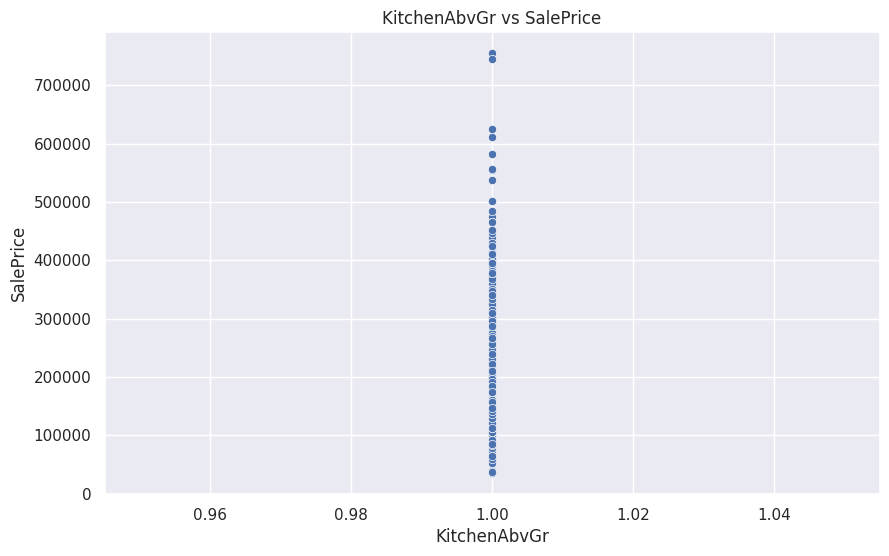

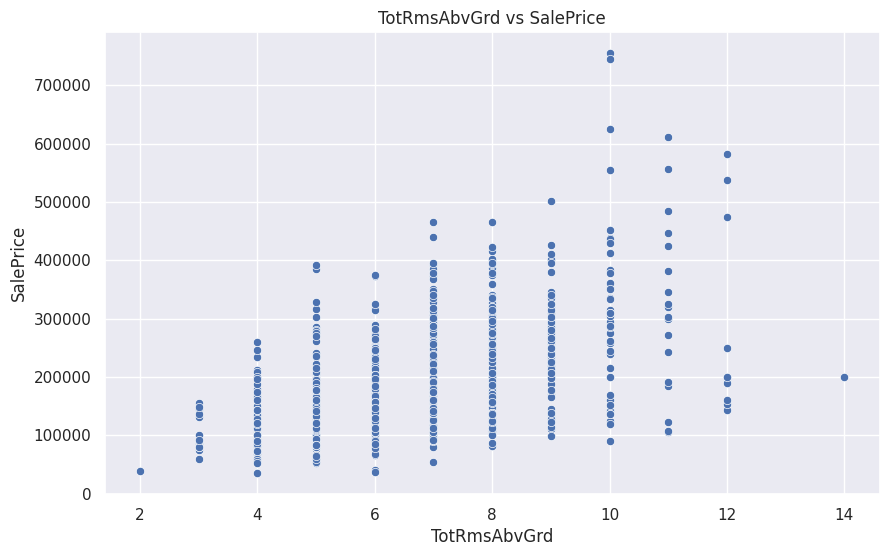

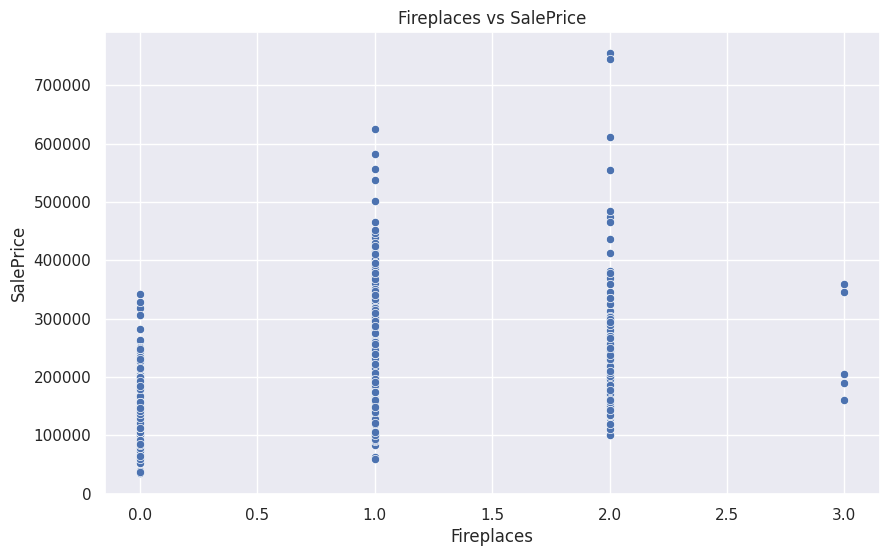

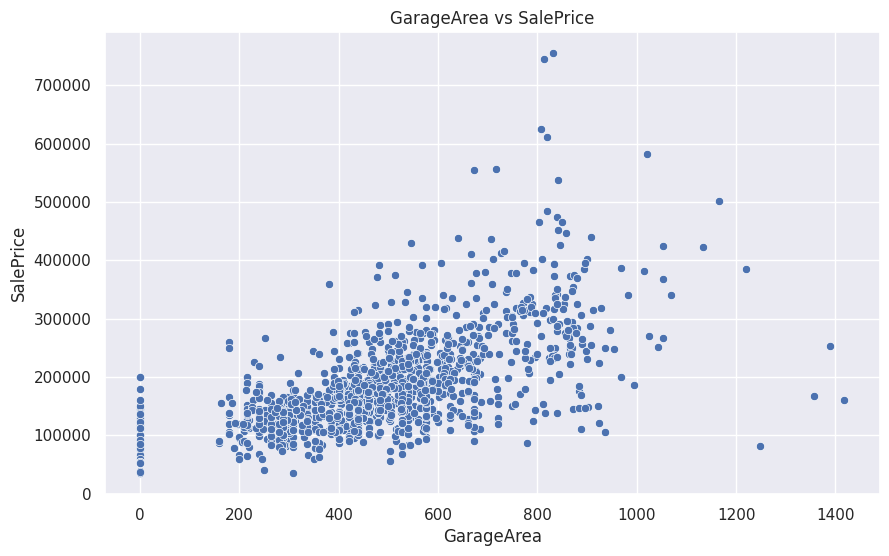

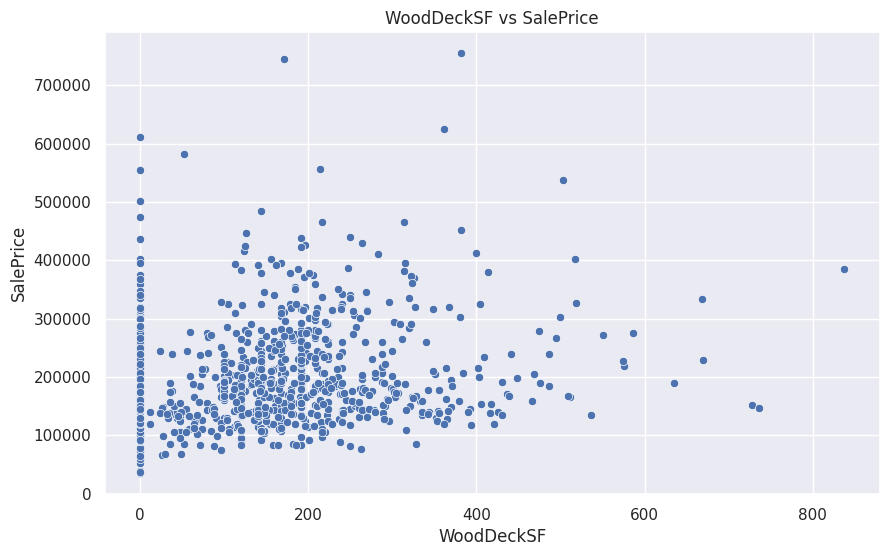

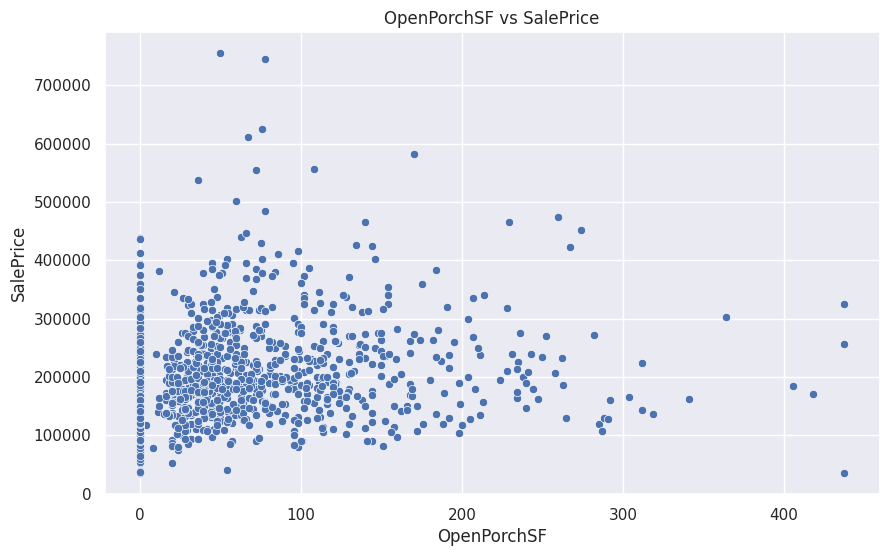

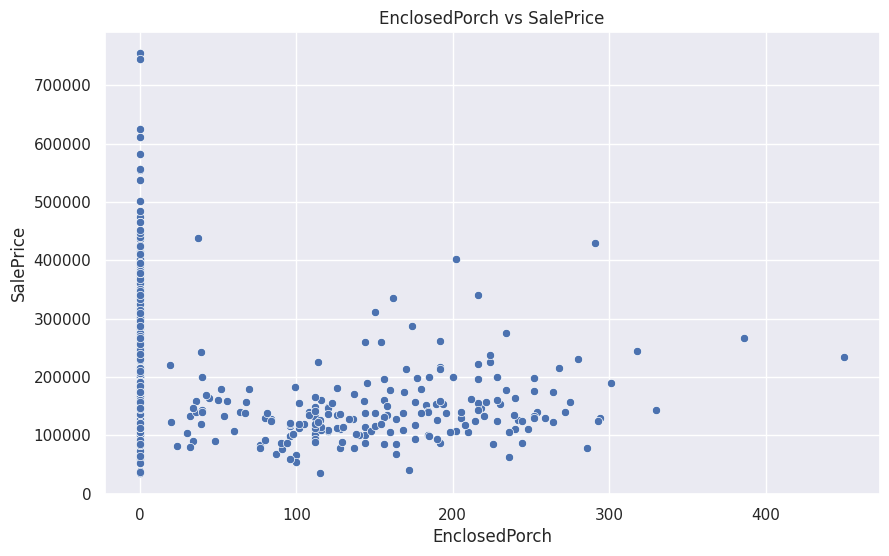

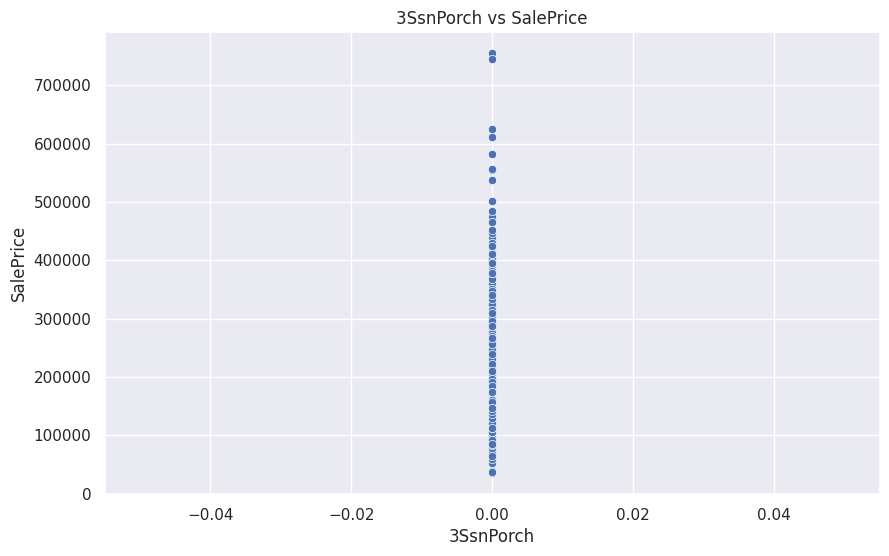

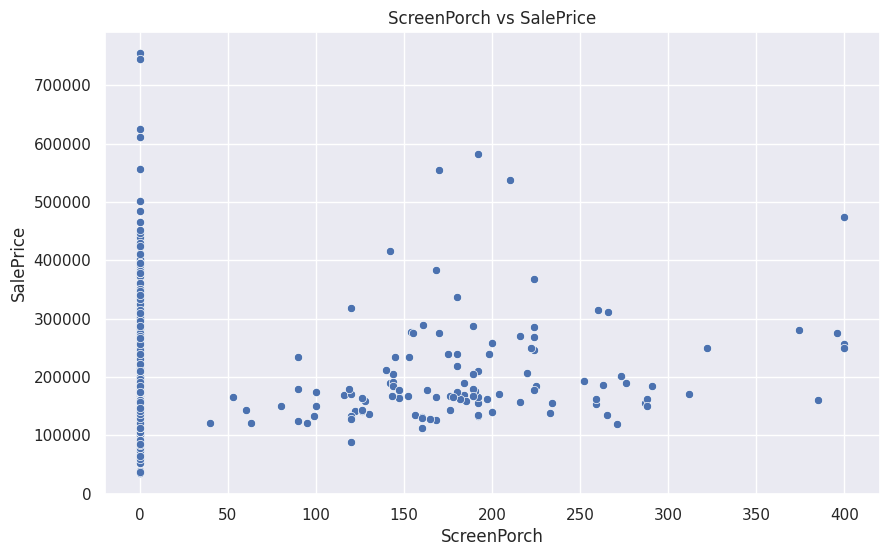

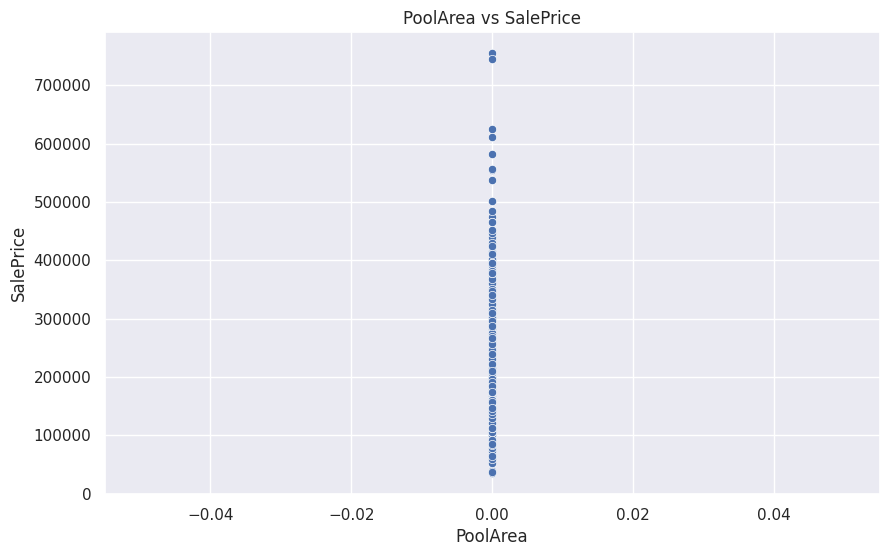

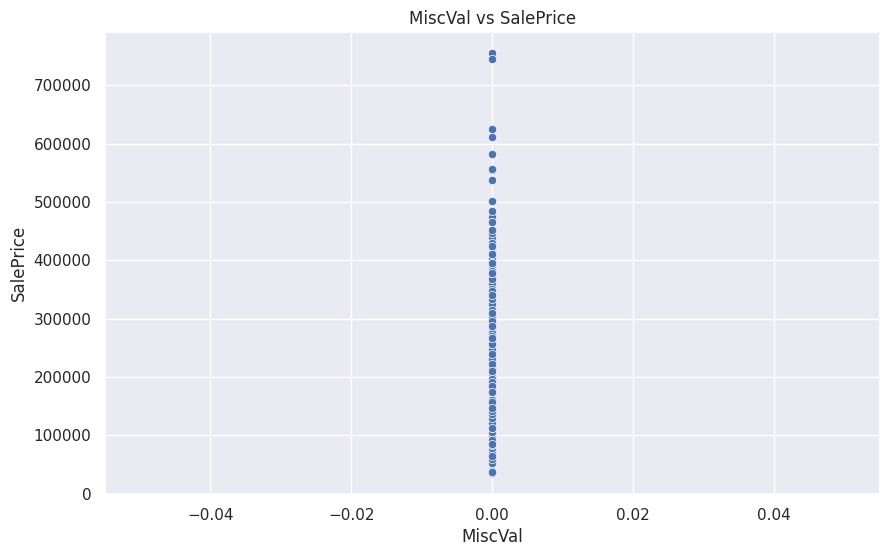

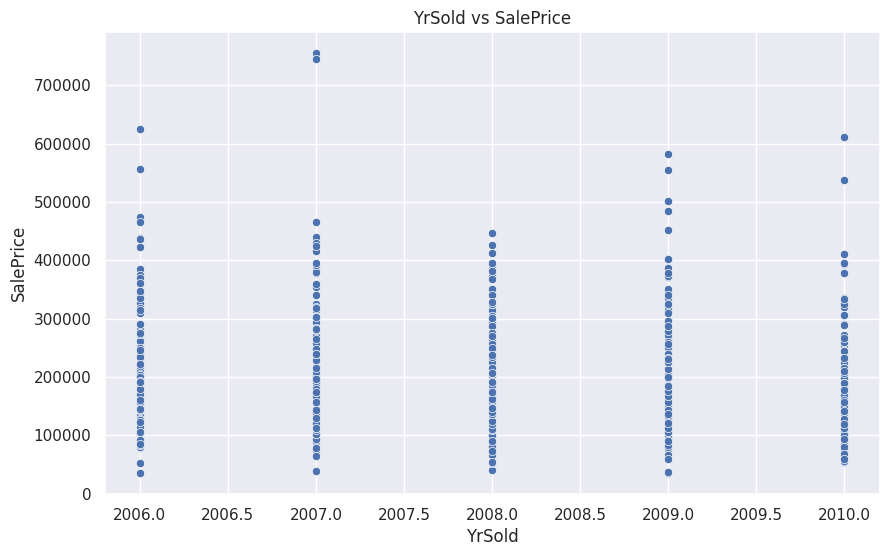

In [ ]:
# Call func
plot_var_price(comb,'SalePrice')

There don't appear to be any apparent non-linear relationships between the numeric vars and SalePrice. However, given the relationship between some of the variables, there are still a few new features we can engineer

###Numeric Variable Feature Engineering
- Use YearBuilt and YearSold to derive home age
- Use YearSold and YearRemodAdd to derive years since remodel
- Total Home square footage
- Total Porch square footage
- Total Bathrooms
- To capture the average size per room, divide sum of square footage on the first and second floors by Total Rooms Above Ground

In [ ]:
# Calculate new numeric features
comb['HomeAge'] = comb['YrSold'] - comb['YearBuilt']
comb['YearsSinceRemodel'] = comb['YrSold'] - comb['YearRemodAdd']
comb['TotalSF'] = comb['1stFlrSF'] + comb['2ndFlrSF'] + comb['TotalBsmtSF']
comb['TotalPorchSF'] = comb['OpenPorchSF'] + comb['3SsnPorch'] + comb['EnclosedPorch'] + comb['ScreenPorch'] + comb['WoodDeckSF']
comb['TotalBaths'] = comb['BsmtFullBath'] + (0.5*comb['BsmtHalfBath']) + comb['FullBath'] + (0.5*comb['HalfBath'])
comb['AvgSFperRoom'] = (comb['1stFlrSF'] + comb['2ndFlrSF']) / comb['TotRmsAbvGrd']

# Drop cols now not neccessary
comb = comb.drop(['YearBuilt','YearRemodAdd','YrSold','1stFlrSF','2ndFlrSF','TotalBsmtSF','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','WoodDeckSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)

###Categorical Variable Feature Engineering
- Check unique value counts for the categorical variables, to see if we can consolidate some with low counts

In [ ]:
# Print unique value counts for the categorical variables
for col in comb.columns:
  if comb[col].dtype == 'object':
    print(comb[col].value_counts())

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64
MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64
Street
Pave    2907
Grvl      12
Name: count, dtype: int64
LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64
LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
Utilities
AllPub    2918
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64
LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64
Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    

In [ ]:
# Based on low counts in all categories but one, drop the following columns
comb = comb.drop(['Street','Utilities'], axis = 1)

# Combine low value counts into larger groups for certain vars
comb['Condition1'] = comb['Condition1'].replace(['RRNn','RRAn','RRNe','RRAe'],'RR')
comb['Condition2'] = comb['Condition2'].replace(['RRNn','RRAn','RRNe','RRAe'],'RR')
comb['RoofMatl'] = comb['RoofMatl'].replace(['WdShake','WdShngl','Metal','Membran','Roll','ClyTile'],'Other')
comb['Exterior1st'] = comb['Exterior1st'].replace(['BrkComm','AsphShn','Stone','CBlock','ImStucc'],'Other')
comb['Exterior2nd'] = comb['Exterior2nd'].replace(['BrkComm','AsphShn','Stone','CBlock','ImStucc'],'Other')
comb['Heating'] = comb['Heating'].replace(['Grav','Wall','OthW','Floor'],'Other')

###Create Dummy Variables
Want to create two sets of dummies, one for ordinal encoding, and one for non-ordinal encoding

In [ ]:
# Isolate numerical vars
numeric_vars = comb.select_dtypes(include=('number'))

In [ ]:
# Isolate categorical vars
categorical_vars = comb.select_dtypes(include=('object'))
categorical_vars = categorical_vars.drop(['train_test'], axis = 1)

In [ ]:
# Generate dummies
dummies = pd.get_dummies(categorical_vars, drop_first = True)

In [ ]:
# Combine numerical and dummies
comb2 = pd.concat([numeric_vars,dummies,comb['train_test']], axis = 1)
comb2.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice,HomeAge,YearsSinceRemodel,TotalSF,TotalPorchSF,TotalBaths,AvgSFperRoom,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RR,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RR,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Other,RoofMatl_Tar&Grv,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Other,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,train_test
0,1,65.0,8450.0,7,5,196.0,706.0,0.0,150.0,0,3,1,8,0,548.0,0,0,208500.0,5.0,5.0,2566.0,61.0,3.5,213.750000,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,

###Check our final dataset including dummy variables for any remaining highly correlated features

In [ ]:
# Stack-rank variable pairs by correlation
def get_sorted_correlations(df, threshold):
    corr_matrix = df.corr().abs()
    corr_unstacked = corr_matrix.unstack().reset_index()
    corr_unstacked.columns = ['Variable1', 'Variable2', 'Correlation']
    corr_unstacked = corr_unstacked[corr_unstacked['Variable1'] != corr_unstacked['Variable2']]
    corr_filtered = corr_unstacked[corr_unstacked['Correlation'] >= threshold]
    sorted_corr = corr_filtered.sort_values(by='Correlation', ascending=False)
    sorted_corr = sorted_corr.drop_duplicates(subset=['Correlation'])

    return sorted_corr

In [ ]:
# Show all rows
pd.set_option('display.max_rows', None)
sorted_corr = get_sorted_correlations(comb2.drop(['SalePrice','train_test'], axis = 1), 0.8)
sorted_corr

,Variable1,Variable2,Correlation
8525,MSSubClass_90,BldgType_Duplex,1.000000
35043,BsmtFinType1_No,BsmtFinType2_No,0.993555
43063,GarageType_No,GarageCond_No,0.993331
32301,BsmtQual_No,BsmtFinType1_No,0.987229
50387,SaleType_New,SaleCondition_Partial,0.986573
24514,Exterior1st_CemntBd,Exterior2nd_CmentBd,0.983411
35028,BsmtFinType1_No,BsmtCond_No,0.981018
36393,BsmtFinType2_No,BsmtQual_No,0.980858
28385,Exterior2nd_VinylSd,Exterior1st_VinylSd,0.978188
6016,MSSubClass_190,BldgType_2fmCon,0.975118


In [ ]:
# Drop remaining highly correlated variables
drop_cols = sorted_corr['Variable2'].unique().tolist()
comb2 = comb2.drop(drop_cols, axis = 1)

In [ ]:
comb2.to_csv('comb2.csv')

###Scale Data

In [ ]:
# Identify numeric cols
numeric_cols = comb2.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('Id')
numeric_cols.remove('SalePrice')

In [ ]:
# Scale all the numeric data, except for the Id and SalePrice
scaler = StandardScaler()
comb_scaled = comb2.copy()
comb_scaled[numeric_cols] = scaler.fit_transform(comb_scaled[numeric_cols])

In [ ]:
comb_scaled.to_csv('comb_scaled.csv')

In [ ]:
comb_scaled.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,PoolArea,MiscVal,SalePrice,HomeAge,YearsSinceRemodel,TotalSF,TotalPorchSF,TotalBaths,AvgSFperRoom,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RR,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RR,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Other,RoofMatl_Tar&Grv,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Other,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_No,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_No,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,train_test
0,1,0.220763,-0.296901,0.646183,-0.507284,0.535564,0.592633,-0.295189,-0.934165,-0.056808,0.170745,-0.142685,0.986849,-0.924311,0.349364,-0.040426,-0.065077,208500.0,-1.037881,-0.887009,0.024904,-0.755805,1.586446,-0.367598,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False

###Split Data into Training and Testing Sets

In [ ]:
# Isolate train dataset from combined data
train_scaled = comb_scaled[comb_scaled['train_test'] == 'train']
test_scaled = comb_scaled[comb_scaled['train_test'] == 'test']

# Create X and y vars
X = train_scaled.drop(['Id','SalePrice','train_test'], axis = 1)
y = np.log1p(train_scaled['SalePrice'])

# Split into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
X_train.shape

(1095, 206)

In [ ]:
X_test.shape

(365, 206)

###Step 4 - Model Building and Testing
 Run a few different models to assess best fit
 - Basic Linear Regression
 - LASSO Regression

Models will be assessed primarily on RMSE on the test data.

**Model 1: Basic OLS Linear Regression**

In [ ]:
# Fit model w/ training data
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Get coefficients and variable names
coefficients = ols_model.coef_
intercept = ols_model.intercept_

# Print the results
print("Intercept:", intercept)
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

# Save as a DF
#ols_results = pd.DataFrame({'Variable': X_test.columns, 'Coefficient': coefficients})
#ols_results.to_csv('ols_results.csv')

Intercept: 12378615238.727709
LotFrontage: -0.0006923523064743581
LotArea: 0.021338800397881233
OverallQual: 0.06971061799946267
OverallCond: 0.03718877340876042
MasVnrArea: 0.0016086016494563544
BsmtFinSF1: 0.11789244696528711
BsmtFinSF2: 0.05135974818254177
BsmtUnfSF: 0.10499225036387916
LowQualFinSF: -133482737295.43542
BedroomAbvGr: 0.010621872612048928
KitchenAbvGr: 18022268446.47011
TotRmsAbvGrd: 0.1542697506712304
Fireplaces: 0.01550602202760035
GarageArea: 0.028904034911598493
PoolArea: -16884014107.21686
MiscVal: 9691759637.33043
HomeAge: -0.05353034491790021
YearsSinceRemodel: -0.02408512432151791
TotalSF: -0.1461349166188913
TotalPorchSF: 0.014419751974417805
TotalBaths: 0.023684748829985044
AvgSFperRoom: 0.12849588780790386
MSSubClass_150: 4068382422.539382
MSSubClass_160: -0.0774506909225097
MSSubClass_180: -0.020621928743698108
MSSubClass_190: -17441889823.372684
MSSubClass_20: -17441889823.30329
MSSubClass_30: -17441889823.341305
MSSubClass_40: -17441889823.281235
MSSubC

In [ ]:
# Check performance against the training data
ols_pred_train = ols_model.predict(X_train)
ols_errors_train = y_train - ols_pred_train

# Run RMSE and R2 on training
ols_train_rmse = np.sqrt(mean_squared_error(y_train, ols_pred_train))
ols_train_r2 = r2_score(y_train, ols_pred_train)

# Check performance against the test data
ols_pred_test = ols_model.predict(X_test)
ols_errors_test = y_test - ols_pred_test

# Run RMSE and R2 on test
ols_test_rmse = np.sqrt(mean_squared_error(y_test, ols_pred_test))
ols_test_r2 = r2_score(y_test, ols_pred_test)

print("OLS Train RMSE: ",ols_train_rmse)
print("OLS Train R2: ",ols_train_r2)
print("OLS Test RMSE: ",ols_test_rmse)
print("OLS Test R2: ",ols_test_r2)

OLS Train RMSE:  0.10390817114271682
OLS Train R2:  0.9302009775825186
OLS Test RMSE:  1581490732.8812819
OLS Test R2:  -1.4444184037594726e+19


Based on the results of the linear regression, we see (unsurprisingly) good RMSE and R2 scores against the training data. However, against the test data, the model performs incredibly poorly. This is could be driven by two issues:
- A case of extreme overfitting, which shouldn't come as a surprise, as we are including upwards of 200 explanatory variables in this model.
- There isn't a clean linear relationship between the explanatory variables and SalePrice.

**Model 2: LASSO Regression**

To try and get a better fit to the test data, use LASSO to perform feature selection, this will lead to a better, more reliable model overall.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.911e+00, tolerance: 1.694e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

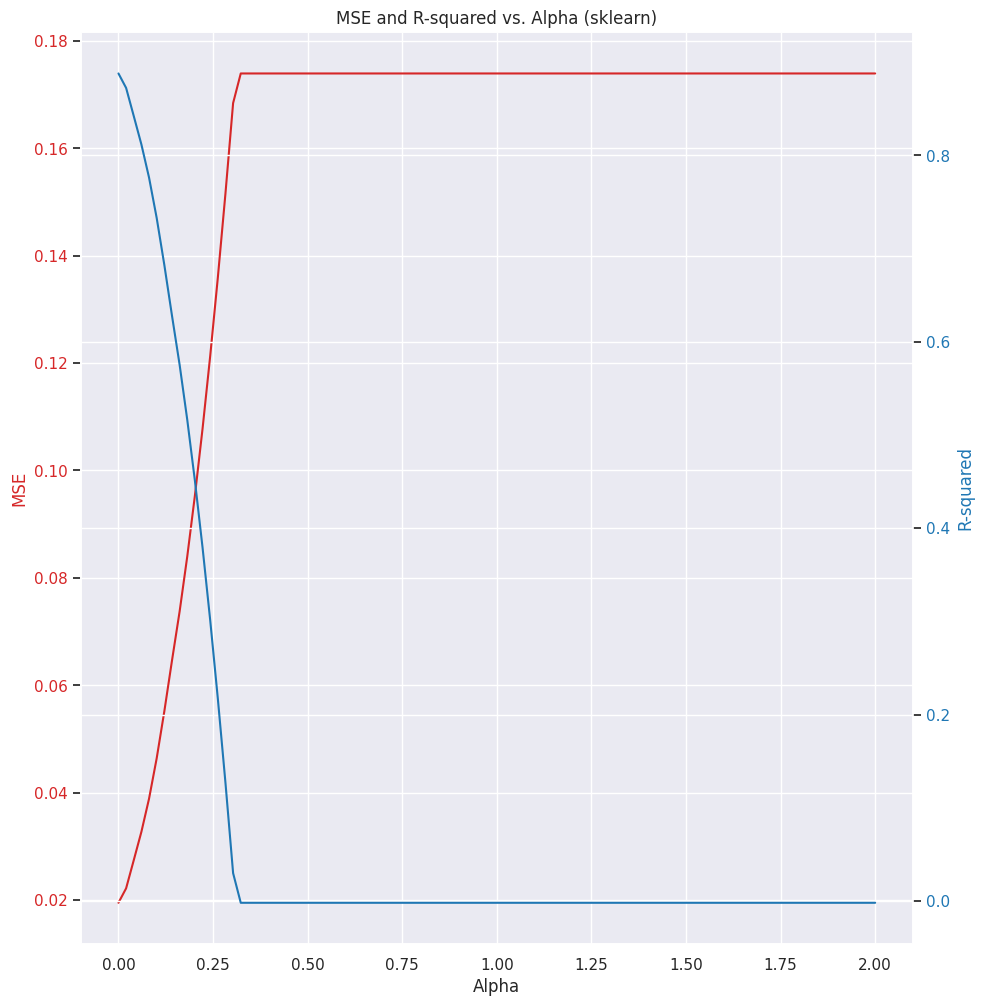

In [ ]:
# Fit LASSO Model w/ training data

# Set alpha values between 0 and 2, select for the best one based on MSE
alpha_values = np.linspace(0, 2, 100)
r2_values = []
mse_values = []

for alpha in alpha_values:
  model_lasso = Lasso(alpha=alpha)
  model_lasso.fit(X_train, y_train)
  y_pred = model_lasso.predict(X_test)
  r2 = 1 - np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y))**2)
  mse = np.mean((y_test - y_pred)**2)
  r2_values.append(r2)
  mse_values.append(mse)

# Plot MSE and R^2
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Alpha')
ax1.set_ylabel('MSE', color=color)
ax1.plot(alpha_values, mse_values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('R-squared', color=color)
ax2.plot(alpha_values, r2_values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('MSE and R-squared vs. Alpha (sklearn)')
plt.show()

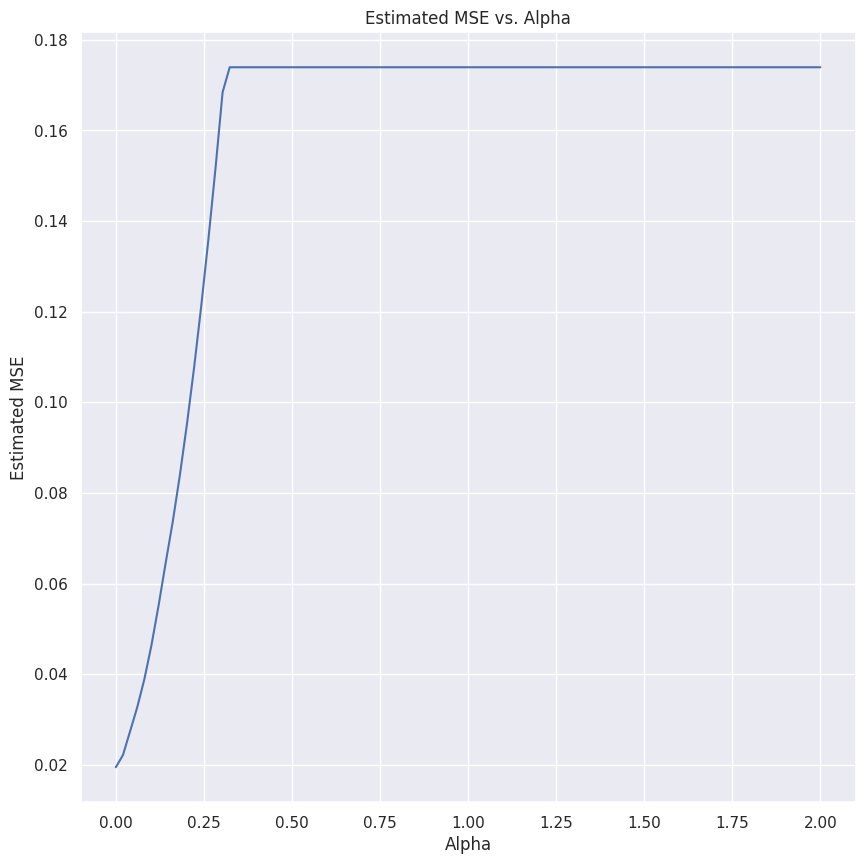

In [ ]:
# Plot MSE
plt.plot(alpha_values, mse_values)
plt.xlabel('Alpha')
plt.ylabel('Estimated MSE')
plt.title('Estimated MSE vs. Alpha')
plt.show()

In [ ]:
# Find optimal alpha
optimal_alpha = alpha_values[np.argmin(mse_values)]
print("Optimal alpha:", optimal_alpha)

# Fit LASSO regression with optimal alpha
lasso_model = Lasso(alpha=optimal_alpha)
lasso_model.fit(X_train, y_train)

# Get coefficients and variable names
coefficients = lasso_model.coef_
intercept = lasso_model.intercept_

# Print the results
print("Intercept:", intercept)
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

Optimal alpha: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


Intercept: 12.785841881362328
LotFrontage: -0.0007062252849765705
LotArea: 0.021330439547763456
OverallQual: 0.06970163665794549
OverallCond: 0.03714396816498061
MasVnrArea: 0.0016199128014983298
BsmtFinSF1: 0.11739566430093061
BsmtFinSF2: 0.05121871389063463
BsmtUnfSF: 0.1044837097726047
LowQualFinSF: 16.440182648401827
BedroomAbvGr: 0.010566046170388357
KitchenAbvGr: 0.0684931506849315
TotRmsAbvGrd: 0.15398790986878166
Fireplaces: 0.015500625552307244
GarageArea: 0.02889770574833799
PoolArea: 0.0
MiscVal: 0.0
HomeAge: -0.053491078615134066
YearsSinceRemodel: -0.02406684827056531
TotalSF: -0.14539803373642618
TotalPorchSF: 0.014432687791384199
TotalBaths: 0.02370078186361788
AvgSFperRoom: 0.12825438499742212
MSSubClass_150: 0.0
MSSubClass_160: -0.07739934173269167
MSSubClass_180: -0.020683534504688943
MSSubClass_190: -0.031474552892087365
MSSubClass_20: 0.03804354352753286
MSSubClass_30: -7.342354324570328e-05
MSSubClass_40: 0.05999045037570072
MSSubClass_45: 0.027419892809526634
MSSu

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.911e+00, tolerance: 1.694e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Check performance against the training data
lasso_pred_train = lasso_model.predict(X_train)
lasso_errors_train = y_train - lasso_pred_train

# Run RMSE and R2 on training
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_pred_train))
lasso_train_r2 = r2_score(y_train, lasso_pred_train)

# Check performance against the test data
lasso_pred_test = lasso_model.predict(X_test)
lasso_errors_test = y_test - lasso_pred_test

# Run RMSE and R2 on test
lasso_test_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred_test))
lasso_test_r2 = r2_score(y_test, lasso_pred_test)

print("LASSO Train RMSE: ",lasso_train_rmse)
print("LASSO Train R2: ",lasso_train_r2)
print("LASSO Test RMSE: ",lasso_test_rmse)
print("LASSO Test R2: ",lasso_test_r2)

LASSO Train RMSE:  0.1039084241934102
LASSO Train R2:  0.9302006376147888
LASSO Test RMSE:  0.13955893490125143
LASSO Test R2:  0.8875200788970417


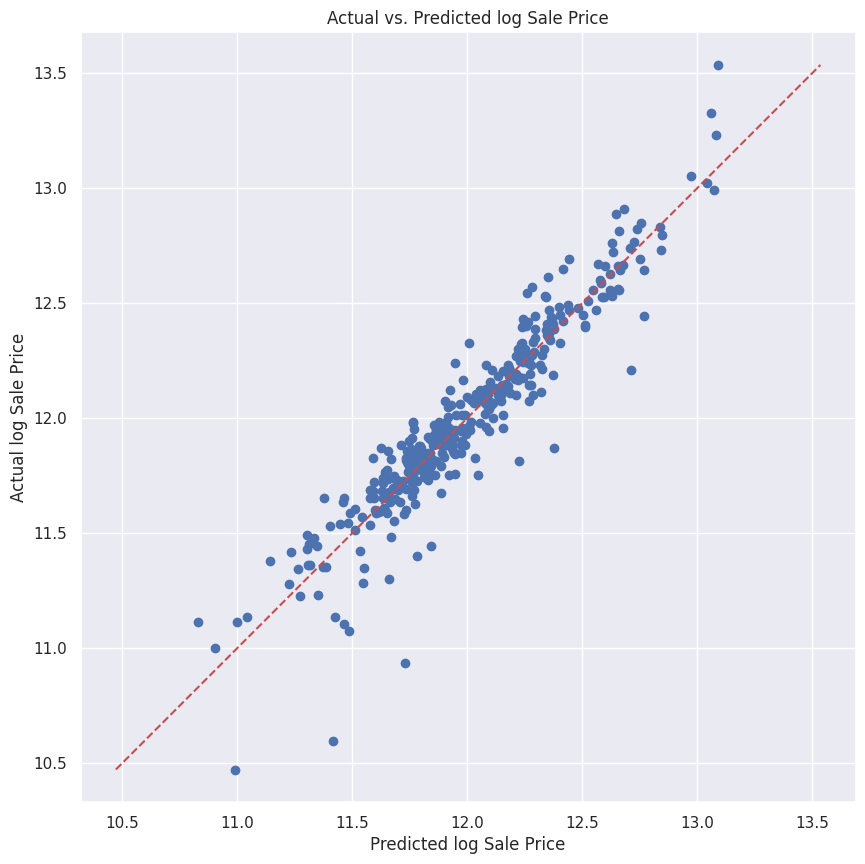

In [ ]:
# Plot LASSO prediction against actuals
plt.scatter(lasso_pred_test, y_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Predicted log Sale Price')
plt.ylabel('Actual log Sale Price')
plt.title('Actual vs. Predicted log Sale Price')
plt.axis('equal')
plt.show()

The LASSO regression returns a much better model than the base OLS linear regression. By shrinking a number of coefficients, some to 0, we were able to achieve a much better fit to the test dataset (i.e. much less overfit than the OLS model). The following coefficients were selected out (shrunk to 0):
- PoolArea
- MiscVal
- MSSubClass_150
- Condition2_PosA
- Electrical_Mix

Many other coefficients were greatly shrunk down compared to the OLS model, leading to an overall better fitting model to new unseen data.

Now run the model one last time, but on all of the training data combined to get final performance metrics.

In [ ]:
# Check performance against the full dataset
lasso_pred_total = lasso_model.predict(X)
lasso_errors_total = y - lasso_pred_total

# Run RMSE and R2 on test
lasso_total_rmse = np.sqrt(mean_squared_error(y, lasso_pred_total))
lasso_total_r2 = r2_score(y, lasso_pred_total)

print("LASSO Total RMSE: ",lasso_total_rmse)
print("LASSO Total R2: ",lasso_total_r2)

LASSO Total RMSE:  0.11387227292656098
LASSO Total R2:  0.9186775841408908
